## 시계열 예측 모델_결측치

In [115]:
import warnings
warnings.filterwarnings('ignore')

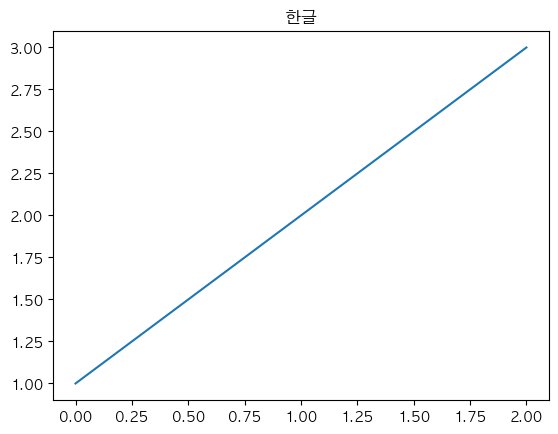

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

### 결측치 제거

In [117]:
import pandas as pd

df = pd.read_csv('../data/울산_전처리_ver6.csv')

In [118]:
df.isna().sum()

호출부호                      0
입항일시                      0
출항일시                      0
접안_대기시간_분                 0
출항_대기시간_분                 0
Service_Time_Start        0
Service_Time_End          0
계선장소_코드                   0
계선장소_숫자                   0
계선장소명                     0
선박용도                      0
Service_Time_분            0
대기율                      25
총톤수                   10524
재화중량톤수                12204
선박제원(총길이, m)            612
선박제원(너비, m)             612
만재흘수(m)               10521
깊이(m)                 10521
길이1(m)                10521
선박국적(code)            10521
선박국적(이름)              10521
ETA_Year                  0
ETA_Month                 0
ETA_Day                   0
ETA_Hour                  0
ETA_Minute                0
일시                     2645
풍속(m/s)                6874
풍향(deg)                7660
GUST풍속(m/s)            6723
현지기압(hPa)              2890
습도(%)                  4237
기온(°C)                 2825
수온(°C)                 4099
최대파고(m)             

#### 입항,출항 일시가 같은 행 제거

In [119]:
rows_with_null = df[df['대기율'].isnull()]

In [120]:
rows_with_null.head()

,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,...,GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
3517,60821,2020-12-18 18:00:00,2020-12-18 18:00,0,0.0,2020-12-18 18:00:00,2020-12-18 18:00:00,MBO,2,온산2부두,...,7.7,1023.9,49.0,8.3,18.1,1.8,1.3,0.9,8.0,57.0
3607,66597,2020-12-09 12:30:00,2020-12-09 12:30,0,0.0,2020-12-09 12:30:00,2020-12-09 12:30:00,MLJ,1,장생포호안,...,3.9,1025.9,44.0,9.0,18.7,1.4,0.9,0.6,7.1,34.0
5351,90831,2020-12-07 18:20:00,2020-12-07 18:20,0,0.0,2020-12-07 18:20:00,2020-12-07 18:20:00,MBN,12,현대오일터미널신항부두,...,3.8,1024.2,49.0,11.9,19.2,1.1,0.6,0.4,6.4,37.0
5805,91116,2022-10-21 10:10:00,2022-10-21 11:30,0,80.0,2022-10-21 10:10:00,2022-10-21 10:10:00,MLJ,1,장생포호안,...,NaN,1025.9,70.0,20.1,22.7,1.1,0.7,0.5,3.2,269.0
6650,100611,2022-07-04 07:30:00,2022-07-04 08:15,0,45.0,2022-07-04 07:30:00,2022-07-04 07:30:00,MLJ,1,장생포호안,...,2.3,1007.4,93.0,26.3,24.8,0.6,0.4,0.3,3.6,144.0


In [121]:
rows_with_null[['접안_대기시간_분','Service_Time_분','대기율']].head()

,접안_대기시간_분,Service_Time_분,대기율
3517,0,0.0,NaN
3607,0,0.0,NaN
5351,0,0.0,NaN
5805,0,0.0,NaN
6650,0,0.0,NaN


In [122]:
df = df.dropna(subset=['대기율'])

#### 선박용도별 평균으로 결측치 대체

In [123]:
df['총톤수']

0           NaN
1           NaN
2           NaN
3           NaN
4           141
          ...  
72134    64,321
72135    64,555
72136    20,117
72137     6,051
72138    29,735
Name: 총톤수, Length: 72114, dtype: object

In [124]:
# 쉽표 제거
columns_to_fix = ['총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)']
df[columns_to_fix] = df[columns_to_fix].replace({',': ''}, regex=True)

# 숫자로 변환
df[columns_to_fix] = df[columns_to_fix].apply(pd.to_numeric, errors='coerce')

In [125]:
grouped_by_usage = df.groupby('선박용도')[columns_to_fix]

- 분포 확인

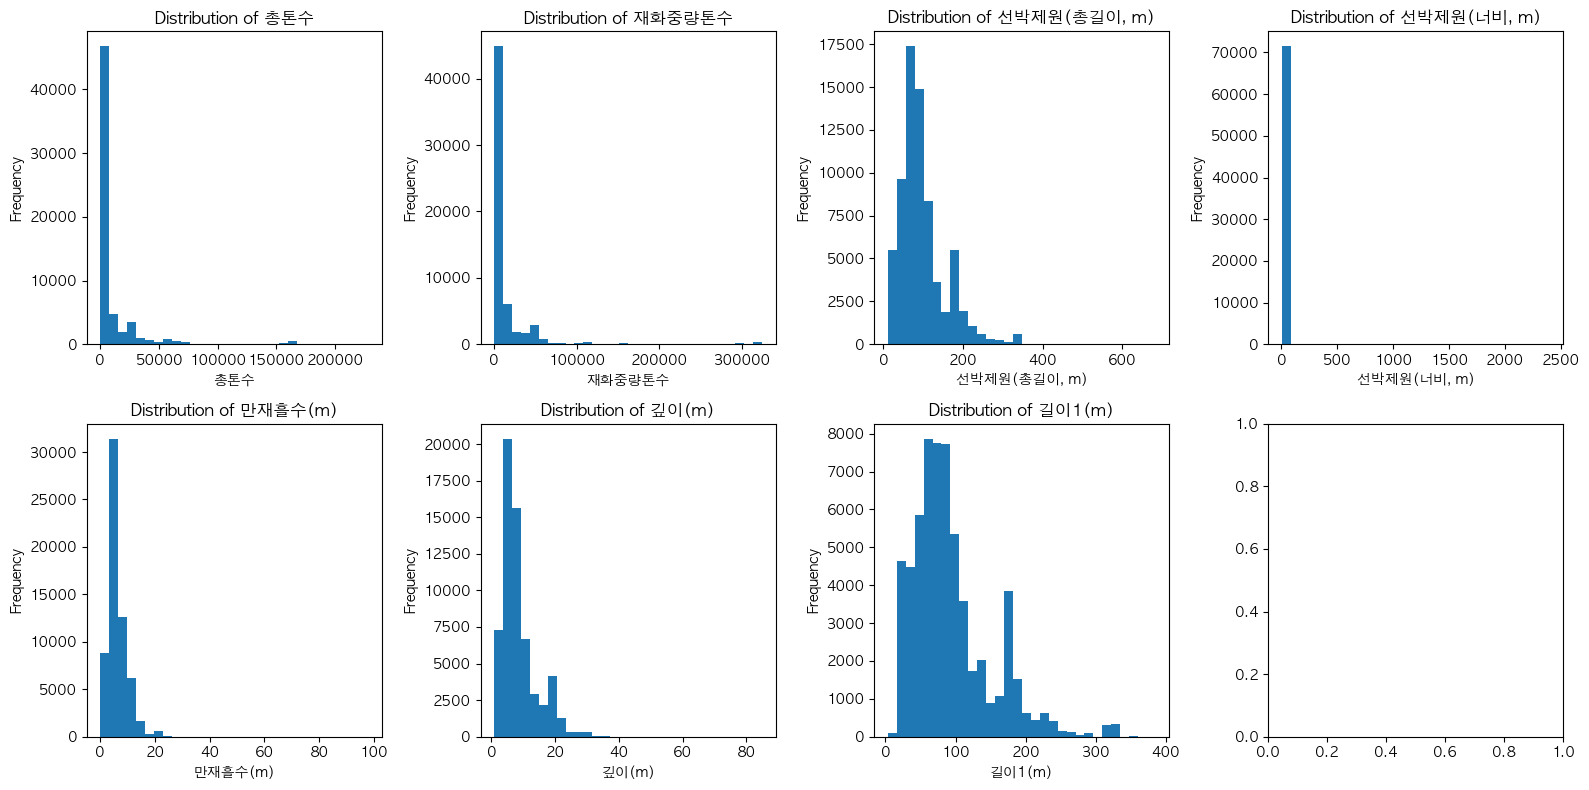

In [126]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, column in enumerate(columns_to_fix):
    ax = axes[i // 4, i % 4]
    ax.hist(df[column].dropna(), bins=30)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- 선박용도별 중앙값으로 대체

In [127]:
df['총톤수'] = df.groupby('선박용도')['총톤수'].transform(lambda x: x.fillna(x.median()))
df['재화중량톤수'] = df.groupby('선박용도')['재화중량톤수'].transform(lambda x: x.fillna(x.median()))
df['선박제원(총길이, m)'] = df.groupby('선박용도')['선박제원(총길이, m)'].transform(lambda x: x.fillna(x.median()))
df['선박제원(너비, m)'] = df.groupby('선박용도')['선박제원(너비, m)'].transform(lambda x: x.fillna(x.median()))
df['만재흘수(m)'] = df.groupby('선박용도')['만재흘수(m)'].transform(lambda x: x.fillna(x.median()))
df['깊이(m)'] = df.groupby('선박용도')['깊이(m)'].transform(lambda x: x.fillna(x.median()))
df['길이1(m)'] = df.groupby('선박용도')['길이1(m)'].transform(lambda x: x.fillna(x.median()))

In [128]:
df.isna().sum()

호출부호                      0
입항일시                      0
출항일시                      0
접안_대기시간_분                 0
출항_대기시간_분                 0
Service_Time_Start        0
Service_Time_End          0
계선장소_코드                   0
계선장소_숫자                   0
계선장소명                     0
선박용도                      0
Service_Time_분            0
대기율                       0
총톤수                       2
재화중량톤수                    2
선박제원(총길이, m)              1
선박제원(너비, m)               1
만재흘수(m)                   2
깊이(m)                     2
길이1(m)                    2
선박국적(code)            10519
선박국적(이름)              10519
ETA_Year                  0
ETA_Month                 0
ETA_Day                   0
ETA_Hour                  0
ETA_Minute                0
일시                     2644
풍속(m/s)                6871
풍향(deg)                7657
GUST풍속(m/s)            6720
현지기압(hPa)              2889
습도(%)                  4236
기온(°C)                 2824
수온(°C)                 4097
최대파고(m)             

#### 국가 코드_제거

In [129]:
df.drop(columns = ['선박국적(code)','선박국적(이름)'], inplace = True)

#### 일시_제거

In [130]:
df.drop(columns = '일시', inplace = True)

#### 날씨 데이터_선형보간

In [131]:
df[df['풍속(m/s)'].isnull()]

,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,...,GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
4,552,2021-07-03 16:20:00,2021-07-05 04:15,0,0.0,2021-07-03 16:20:00,2021-07-05 04:15:00,MLJ,1,장생포호안,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,584,2021-04-29 16:25:00,2021-07-24 03:55,0,0.0,2021-04-29 16:25:00,2021-07-24 03:55:00,MBM,1,매암부두,...,NaN,1004.8,72.0,16.7,NaN,1.2,0.7,0.5,4.3,30.0
76,637,2021-01-16 23:50:00,2021-01-19 01:05,0,0.0,2021-01-16 23:50:00,2021-01-19 01:05:00,MQP,3,현중해양의장안벽,...,14.0,1021.8,51.0,4.4,15.4,4.2,2.7,1.9,9.1,358.0
89,637,2021-04-06 17:20:00,2021-04-07 15:15,0,0.0,2021-04-06 17:20:00,2021-04-07 15:15:00,MQP,3,현중해양의장안벽,...,NaN,1017.5,60.0,16.1,NaN,1.4,0.8,0.6,5.8,50.0
90,637,2021-04-08 23:20:00,2021-04-10 05:50,0,0.0,2021-04-08 23:20:00,2021-04-10 05:50:00,MQP,3,현중해양의장안벽,...,NaN,1019.3,67.0,16.1,NaN,1.9,1.1,0.8,7.1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72116,ZGGC2,2021-05-04 14:30:00,2021-05-05 11:10,0,0.0,2021-05-04 14:30:00,2021-05-05 11:10:00,MBF,2,신항남방파제T/S부두 02,...,NaN,1014.5,82.0,17.8,17.0,2.5,1.5,1.1,4.9,197.0
72120,ZGGU,2021-04-09 07:30:00,2021-04-10 09:30,0,0.0,2021-04-09 07:30:00,2021-04-10 09:30:00,MB7,1,7부두 01,...,NaN,1021.9,62.0,15.9,NaN,1.3,0.9,0.6,6.4,30.0
72128,ZGGU2,2021-07-12 09:12:00,2021-07-13 10:50,608,0.0,2021-07-12 19:20:00,2021-07-13 10:50:00,WAE,1,정박지-E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72131,ZGHJ4,2021-06-11 19:18:00,2021-06-29 19:10,802,0.0,2021-06-12 08:40:00,2021-06-29 19:10:00,MBN,27,용연부두 02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 날씨-시계열 데이터 선형보간

In [132]:
df = df.sort_values(by=['ETA_Year','ETA_Month', 'ETA_Day', 'ETA_Hour'])

In [133]:
# 'ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour' 순서로 컬럼 선택
df = df[['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour'] + [col for col in df.columns if col not in ['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour']]]

In [134]:
df

,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,...,GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
21970,2020,1,1,0,185303,2020-01-01 00:10:00,2020-01-01 04:50,0,0.0,2020-01-01 00:10:00,...,10.9,NaN,47.0,3.8,17.5,4.4,3.0,2.1,10.7,36.0
4603,2020,1,1,1,88238,2020-01-01 01:05:00,2020-01-01 08:15,0,0.0,2020-01-01 01:05:00,...,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0
46120,2020,1,1,3,D7CH,2020-01-01 03:40:00,2020-01-01 13:30,0,0.0,2020-01-01 03:40:00,...,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0
61365,2020,1,1,3,DSRB9,2020-01-01 03:05:00,2020-01-01 14:55,0,0.0,2020-01-01 03:05:00,...,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0
49158,2020,1,1,4,D7SC,2020-01-01 04:30:00,2020-01-01 20:40,0,0.0,2020-01-01 04:30:00,...,14.4,1028.3,53.0,3.4,17.3,3.5,2.1,1.5,9.1,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,2022,12,31,9,130064,2022-12-31 09:45:00,2022-12-31 16:15,0,0.0,2022-12-31 09:45:00,...,14.4,1028.7,64.0,5.7,16.1,2.2,1.6,1.1,5.3,0.0
63837,2022,12,31,10,HOXG,2022-12-31 10:05:00,2022-12-31 20:10,0,0.0,2022-12-31 10:05:00,...,16.1,1029.3,60.0,5.6,16.1,2.3,1.5,1.1,5.8,36.0
25250,2022,12,31,15,200013,2022-12-31 15:55:00,2022-12-31 23:15,0,0.0,2022-12-31 15:55:00,...,9.8,1027.6,49.0,7.8,16.1,2.4,1.5,1.0,5.8,6.0
3656,2022,12,31,17,66597,2022-12-31 17:55:00,2022-12-31 20:40,0,0.0,2022-12-31 17:55:00,...,8.2,1027.6,47.0,8.0,16.2,2.2,1.3,0.9,5.8,33.0


In [135]:
columns_to_interpolate = ['풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)',
                           '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)']

# 선형 보간
df[columns_to_interpolate] = df[columns_to_interpolate].interpolate(method='linear', limit_direction='both')

In [114]:
df.isna().sum()

ETA_Year              0
ETA_Month             0
ETA_Day               0
ETA_Hour              0
호출부호                  0
입항일시                  0
출항일시                  0
접안_대기시간_분             0
출항_대기시간_분             0
Service_Time_Start    0
Service_Time_End      0
계선장소_코드               0
계선장소_숫자               0
계선장소명                 0
선박용도                  0
Service_Time_분        0
대기율                   0
총톤수                   2
재화중량톤수                2
선박제원(총길이, m)          1
선박제원(너비, m)           1
만재흘수(m)               2
깊이(m)                 2
길이1(m)                2
ETA_Minute            0
풍속(m/s)               0
풍향(deg)               0
GUST풍속(m/s)           0
현지기압(hPa)             0
습도(%)                 0
기온(°C)                0
수온(°C)                0
최대파고(m)               0
유의파고(m)               0
평균파고(m)               0
파주기(sec)              0
파향(deg)               0
dtype: int64

In [140]:
df[df['총톤수'].isnull()]['선박용도'] # 하나밖에 없는 선박용도

28481      화객선
66189    원양 어선
Name: 선박용도, dtype: object

In [141]:
df.dropna(inplace = True)

### 이상치

In [143]:
df['접안_대기시간_분']

21970    0
4603     0
46120    0
61365    0
49158    0
        ..
13483    0
63837    0
25250    0
3656     0
1992     0
Name: 접안_대기시간_분, Length: 72112, dtype: int64

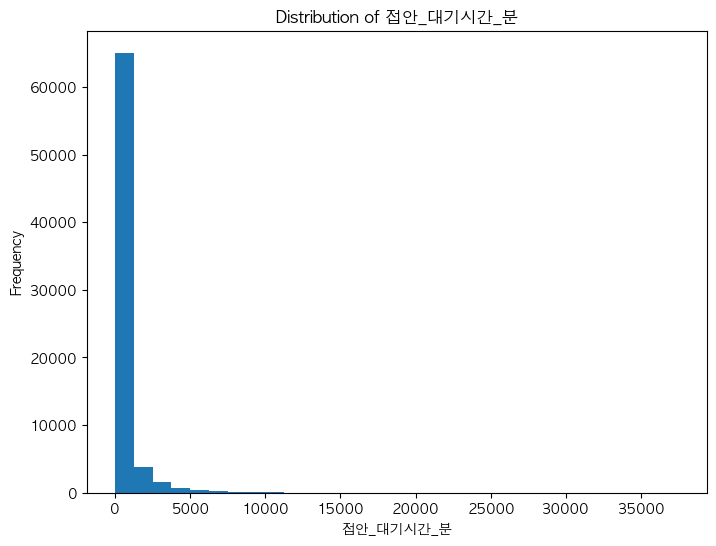

In [146]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df['접안_대기시간_분'], bins=30)
ax.set_title('Distribution of 접안_대기시간_분')
ax.set_xlabel('접안_대기시간_분')
ax.set_ylabel('Frequency')
plt.show()